In [2]:
import graph_fourier_transform
import graph_ruggedness_de
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import networkx as nx
import os
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.stats import spearmanr

### Making KNN graph over His3p combinatorial dataset 
The below cell is run to make build to KNN graph for the gb1 combinatorial dataset. Note that the `approximate` method is used to find the `k` nearest neighbors due to the time complexity of an exact all vs. all search. 

In [14]:
df = pd.read_csv('../data_files/His3p_combinatorial.csv')
seq_ls = df['sequences'].tolist()
values = df['fitness'].tolist()
scaler = MinMaxScaler()
values = [val[0] for val in (scaler.fit_transform(np.array(values).reshape(-1,1)))]

G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

Computing OHE dictionary.: 20it [00:00, 132521.45it/s]
Adding nodes to graph.: 2028it [00:00, 22864.37it/s]


### Sampling Dirichlet energies over subgraphs 
The below cell is run to sample the Dirichlet energy (approximate method due to comp. complexity) over subgraphs with random sampling proportions defined in `sampling_props` for replicates defined in `replicates`. This indicates how robust quantification of ruggedness via Dirichlet energy is to incomplete graphs. The Dirichlet energy is scaled by the ration between the square-root of the number of nodes in the full graph and the square root of the number of nodes in the sampled graph, as the energy is calculated over the number of edges.

In [15]:
sampling_props = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
replicates = 10
nodes = G_k.number_of_nodes()
norm_de_dict = {}

for sampling_prop in sampling_props:
    norm_de = []
    gft_coefficients = []
    
    for _ in range(replicates):

        G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                    sample_size=sampling_prop)
        
        scaling_factor = np.sqrt(G_k.number_of_nodes()) / np.sqrt(G_sampled.number_of_nodes())

        graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                     k=int(np.sqrt(G_sampled.number_of_nodes())))
        sampled_de = graph_ruggedness_de.compute_dirichlet_energy_approximate(G=G_sampled)
        sampled_de = sampled_de / G_sampled.number_of_nodes()
        sampled_de = sampled_de * scaling_factor
        norm_de.append(sampled_de)
    norm_de_dict[sampling_prop] = np.array(norm_de)

Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4112.12it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60044.68it/s]
Computing pairwise signal differences in Laplacian approximation.: 6705it [00:00, 1618392.61it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4562.24it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58829.61it/s]
Computing pairwise signal differences in Laplacian approximation.: 6689it [00:00, 1566919.82it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4688.36it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59135.10it/s]
Computing pairwise signal differences in Laplacian approximation.: 6730it [00:00, 1550374.36it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4556.60it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59273.86it/s]
Computing pairwise signal differences in Laplacian approximation.: 6797it [00:00, 1490650.16it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4616.00it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60328.16it/s]
Computing pairwise signal differences in Laplacian approximation.: 6721it [00:00, 1601335.90it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4173.70it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59830.55it/s]
Computing pairwise signal differences in Laplacian approximation.: 6749it [00:00, 1598563.23it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4684.97it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60144.91it/s]
Computing pairwise signal differences in Laplacian approximation.: 6726it [00:00, 1635224.25it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4637.04it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58804.42it/s]
Computing pairwise signal differences in Laplacian approximation.: 6729it [00:00, 1658545.67it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4687.44it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 56888.11it/s]
Computing pairwise signal differences in Laplacian approximation.: 6618it [00:00, 1655804.34it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4590.40it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59062.00it/s]
Computing pairwise signal differences in Laplacian approximation.: 6673it [00:00, 1580561.93it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4538.53it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 49448.78it/s]
Computing pairwise signal differences in Laplacian approximation.: 11049it [00:00, 1734778.20it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4577.07it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 48312.75it/s]
Computing pairwise signal differences in Laplacian approximation.: 10782it [00:00, 1790158.57it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4511.91it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 48969.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 10825it [00:00, 1639938.63it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4625.44it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 48202.77it/s]
Computing pairwise signal differences in Laplacian approximation.: 11066it [00:00, 1697478.99it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4131.47it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 49355.14it/s]
Computing pairwise signal differences in Laplacian approximation.: 10854it [00:00, 1840285.21it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4609.11it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 49158.60it/s]
Computing pairwise signal differences in Laplacian approximation.: 10792it [00:00, 1655933.01it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4555.85it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 49381.51it/s]
Computing pairwise signal differences in Laplacian approximation.: 10821it [00:00, 1783291.96it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4597.13it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 48733.56it/s]
Computing pairwise signal differences in Laplacian approximation.: 11053it [00:00, 1834281.95it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4640.92it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 48196.67it/s]
Computing pairwise signal differences in Laplacian approximation.: 11103it [00:00, 1632008.32it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4622.04it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 48447.85it/s]
Computing pairwise signal differences in Laplacian approximation.: 10809it [00:00, 1777194.51it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4461.57it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 44283.90it/s]
Computing pairwise signal differences in Laplacian approximation.: 16893it [00:00, 1690994.90it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4495.73it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 42531.62it/s]
Computing pairwise signal differences in Laplacian approximation.: 16497it [00:00, 1614820.25it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4287.61it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 45136.57it/s]
Computing pairwise signal differences in Laplacian approximation.: 16085it [00:00, 1747400.34it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4588.86it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 42378.67it/s]
Computing pairwise signal differences in Laplacian approximation.: 16507it [00:00, 1806203.07it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4218.05it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 29499.38it/s]
Computing pairwise signal differences in Laplacian approximation.: 16680it [00:00, 1647226.19it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4460.64it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 38648.75it/s]
Computing pairwise signal differences in Laplacian approximation.: 16065it [00:00, 1560913.03it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4450.59it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 40443.58it/s]
Computing pairwise signal differences in Laplacian approximation.: 16083it [00:00, 1778460.09it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4454.74it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 38725.49it/s]
Computing pairwise signal differences in Laplacian approximation.: 16492it [00:00, 1797481.01it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4599.49it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 41698.68it/s]
Computing pairwise signal differences in Laplacian approximation.: 16944it [00:00, 1741613.66it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4356.95it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 44499.61it/s]
Computing pairwise signal differences in Laplacian approximation.: 16875it [00:00, 1734861.51it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4595.79it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 43517.03it/s]
Computing pairwise signal differences in Laplacian approximation.: 21057it [00:00, 1802511.52it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4659.93it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 37201.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 22721it [00:00, 1785122.81it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4699.59it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 38198.38it/s]
Computing pairwise signal differences in Laplacian approximation.: 21905it [00:00, 1831663.26it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4726.52it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45067.54it/s]
Computing pairwise signal differences in Laplacian approximation.: 21454it [00:00, 1786330.21it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4688.81it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 41424.23it/s]
Computing pairwise signal differences in Laplacian approximation.: 22500it [00:00, 1832996.80it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4650.04it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 40214.15it/s]
Computing pairwise signal differences in Laplacian approximation.: 21076it [00:00, 1803512.21it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4688.58it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44752.62it/s]
Computing pairwise signal differences in Laplacian approximation.: 22135it [00:00, 1802281.35it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4689.80it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 41809.46it/s]
Computing pairwise signal differences in Laplacian approximation.: 22816it [00:00, 1780380.65it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4733.52it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44022.14it/s]
Computing pairwise signal differences in Laplacian approximation.: 22752it [00:00, 1780853.29it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4753.22it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45341.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 21720it [00:00, 1751894.83it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4562.44it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44197.23it/s]
Computing pairwise signal differences in Laplacian approximation.: 27947it [00:00, 1774527.88it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4664.64it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44292.60it/s]
Computing pairwise signal differences in Laplacian approximation.: 27853it [00:00, 1787036.69it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4722.05it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43488.24it/s]
Computing pairwise signal differences in Laplacian approximation.: 28848it [00:00, 1814922.93it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4454.92it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43963.17it/s]
Computing pairwise signal differences in Laplacian approximation.: 28268it [00:00, 1803949.57it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4711.59it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43964.55it/s]
Computing pairwise signal differences in Laplacian approximation.: 27838it [00:00, 1826160.26it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4704.85it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43986.30it/s]
Computing pairwise signal differences in Laplacian approximation.: 27589it [00:00, 1769421.89it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4712.09it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43810.56it/s]
Computing pairwise signal differences in Laplacian approximation.: 27962it [00:00, 1780980.51it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4676.60it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44137.70it/s]
Computing pairwise signal differences in Laplacian approximation.: 27565it [00:00, 1817061.51it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4678.92it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44174.58it/s]
Computing pairwise signal differences in Laplacian approximation.: 27739it [00:00, 1778117.72it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4690.40it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44333.95it/s]
Computing pairwise signal differences in Laplacian approximation.: 27688it [00:00, 1764922.33it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4588.61it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37158.06it/s]
Computing pairwise signal differences in Laplacian approximation.: 47338it [00:00, 1837659.89it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4510.97it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 7775.16it/s]
Computing pairwise signal differences in Laplacian approximation.: 47992it [00:00, 1828756.33it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4768.17it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37694.39it/s]
Computing pairwise signal differences in Laplacian approximation.: 47351it [00:00, 1796805.35it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4661.86it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37322.75it/s]
Computing pairwise signal differences in Laplacian approximation.: 47903it [00:00, 1833460.28it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4708.93it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37778.03it/s]
Computing pairwise signal differences in Laplacian approximation.: 47820it [00:00, 1847973.18it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4730.33it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37917.94it/s]
Computing pairwise signal differences in Laplacian approximation.: 48030it [00:00, 1828410.32it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4620.51it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37681.71it/s]
Computing pairwise signal differences in Laplacian approximation.: 48098it [00:00, 1840772.61it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4707.12it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37626.14it/s]
Computing pairwise signal differences in Laplacian approximation.: 48002it [00:00, 1849281.55it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4430.07it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37699.91it/s]
Computing pairwise signal differences in Laplacian approximation.: 47975it [00:00, 1861733.43it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4713.08it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37448.78it/s]
Computing pairwise signal differences in Laplacian approximation.: 48078it [00:00, 1885425.02it/s]


Computing the full KNN graph to determine the actual Dirichlet energy when it is 100% sampled. 

In [180]:
G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=True,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))
de = graph_ruggedness_de.compute_dirichlet_energy_approximate(G=G_k)

Computing OHE dictionary.: 20it [00:00, 39831.95it/s]
Adding nodes to graph.: 2028it [00:00, 21410.23it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 2028it [00:00, 4613.63it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 2028it [00:00, 9485.85it/s]
Computing pairwise signal differences in Laplacian approximation.: 54846it [00:00, 1703968.04it/s]


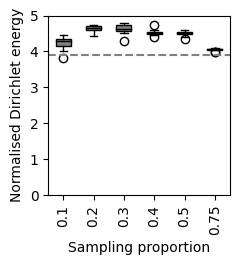

In [181]:
labs = [key for key in norm_de_dict.keys()]
vals = [norm_de_dict[key] for key in norm_de_dict.keys()]


fig, ax = plt.subplots(figsize=(2.5,2.75))
bp = ax.boxplot(vals, labels=[str(label) for label in labs], notch=False, patch_artist=True)

# Set fill colors for each box
color = 'grey'
for box in bp['boxes']:
    box.set_facecolor(color)

# Set median line color
for median in bp['medians']:
    median.set_color('black')
plt.tight_layout()
plt.axhline(de / G_k.number_of_nodes(), color='grey', linestyle='--')
plt.ylim(0,5)
plt.ylabel('Normalised Dirichlet energy')
plt.xlabel('Sampling proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/Figure_4/sampling_boxplot.pdf')
plt.show()


### Interpretation of the graph, ruggedness and epistasis over different sampling proportions. 
Different sampling proportions may influence the interpretation of epistasis / ruggedness over the fitness map. Analysing the graph structures, and their local Dirichlet Energies returned through graph sampling is important in understanding how significantly graph sampling can change the biological / biophysical interpretation of these phenomena. For example - does the graph need to be complete to gain an overview of epistasis and ruggedness in that fitness map? 


#### GFT sums

First - this can be tested quantitatively by comparing the cumulative sum the magnitudes from the GFT, when they have been normalised to sum to 1 and the eigenvector indices have been normalised to sum to 1, over both the full His3p landscape graph and the subsampled His3p landscape graph (with replication). If the trace of the full His3p landscape is not significantly different from the distribution of subsampled traces, the information is not meaningfully lost when the graph nodes are subsampled. 

Computing OHE dictionary.: 20it [00:00, 98573.54it/s]
Adding nodes to graph.: 2028it [00:00, 24401.09it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_22497/656949100.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis_r')


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4640.81it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58652.20it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2121.73it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59492.06it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2858.62it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60023.36it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2152.45it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59227.53it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2836.59it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60181.14it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2649.10it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 53245.52it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2700.39it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 61052.12it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2239.54it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 48250.61it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2843.53it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 59634.11it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 2215.48it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60921.81it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 2565.54it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 51083.21it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 3597.00it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 50079.80it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 2952.36it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 52238.38it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 3161.31it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 51516.46it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 2690.58it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 51118.32it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 2841.46it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 53409.57it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 2441.53it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 54747.28it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 3519.17it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 49001.40it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 3342.55it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 50993.51it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 3176.78it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 52983.60it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 2936.48it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 33802.17it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3265.52it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 45801.17it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3198.38it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 37450.22it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3437.23it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 46574.44it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 2886.66it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47008.31it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3686.57it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47292.14it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3381.94it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47038.92it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3166.10it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47262.91it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3179.25it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47944.92it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 3093.91it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47134.41it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3235.80it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45447.25it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3397.76it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46280.68it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3652.13it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44606.02it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3405.70it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46322.63it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3595.24it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45859.07it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 2893.68it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44793.12it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3130.68it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 47067.27it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3781.02it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 43142.50it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3194.81it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46205.53it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 3338.13it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 47133.56it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3279.98it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44609.24it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4089.36it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43944.56it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4023.65it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44776.42it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3054.68it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44935.13it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3623.76it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44090.82it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3235.14it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44618.12it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3543.70it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43878.15it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3265.39it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43823.24it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3543.12it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44404.92it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 3274.87it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44694.64it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3556.59it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37941.39it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3792.73it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37301.68it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3351.78it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37567.62it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3309.42it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37505.83it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3421.26it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37607.65it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3636.74it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37580.59it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3690.22it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37233.95it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3539.41it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 36947.77it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3509.17it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37560.87it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 3660.36it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37209.93it/s]
Computing OHE dictionary.: 20it [00:00, 58133.11it/s]
Adding nodes to graph.: 2028it [00:00, 10535.18it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 2028it [00:00, 4611.20it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 2028it [00:00, 36114.96it/s]


<Figure size 640x480 with 0 Axes>

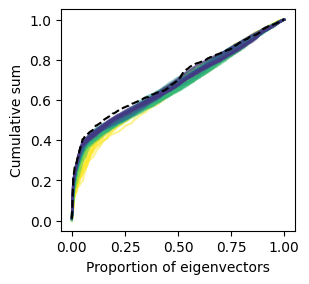

In [49]:
G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

sampling_props = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
replicates = 10
plt.tight_layout()
fig, ax = plt.subplots(figsize=(3, 2.75))
cmap = cm.get_cmap('viridis_r')
num_colors = len(sampling_props)

for i, sampling_prop in enumerate(sampling_props):
    color = cmap(i / num_colors)
    for _ in range(replicates):
        G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                    sample_size=sampling_prop)
        graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                        k=int(np.sqrt(G_sampled.number_of_nodes())))
        norm_gft = graph_fourier_transform.graph_fourier_transform(G=G_sampled)

        cumulative_sum = np.cumsum(norm_gft)
        x_prop = np.linspace(0, 1, len(norm_gft))
        plt.tight_layout()
        plt.plot(x_prop, cumulative_sum, alpha=0.5, color=color)

G_k_con = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=True,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

norm_gft = graph_fourier_transform.graph_fourier_transform(G=G_k_con)
cumulative_sum = np.cumsum(norm_gft)
x_prop = np.linspace(0, 1, len(norm_gft))
plt.tight_layout()
plt.plot(x_prop, cumulative_sum, color='black', linestyle='--')
plt.ylabel('Cumulative sum')
plt.xlabel('Proportion of eigenvectors')
plt.savefig('figures/Figure_4/sampled_vs_true_gft_sums.pdf')

#### Qualitative local Dirichlet Energy analysis
The second approach is a qualitative analysis of the local Dirichlet energy over nodes in both the full and subsampled GFT landscape graphs. If subsampling retains the relative rank of locally rugged nodes, then the biophysical interpretation of epistasis and ruggedness is robust to hamming incomplete graphs. 

In [258]:
df = pd.read_csv('../data_files/His3p_combinatorial.csv')
seq_ls = df['sequences'].tolist()
values = df['fitness'].tolist()
scaler = MinMaxScaler()
values = [val[0] for val in (scaler.fit_transform(np.array(values).reshape(-1,1)))]

G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

G_k_con = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=True,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

graph_ruggedness_de.compute_local_dirichlet_energy(G=G_k_con,
                                                   approximate=True)

G_k_de_dict = {
    G_k_con.nodes[node]['sequence']: G_k_con.nodes[node]['local_dirichlet'] for node in G_k_con.nodes
}

Computing OHE dictionary.: 20it [00:00, 81049.35it/s]
Adding nodes to graph.: 0it [00:00, ?it/s]

Adding nodes to graph.: 2028it [00:00, 25058.62it/s]
Computing OHE dictionary.: 20it [00:00, 309542.73it/s]
Adding nodes to graph.: 2028it [00:00, 24641.50it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 2028it [00:00, 4493.72it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 2028it [00:00, 33817.50it/s]
Computing pairwise signal differences in Laplacian approximation.: 1134it [00:00, 1741611.40it/s]
Computing pairwise signal differences in Laplacian approximation.: 1134it [00:00, 1835008.00it/s]
Computing pairwise signal differences in Laplacian approximation.: 1134it [00:00, 1837844.18it/s]
Computing pairwise signal differences in Laplacian approximation.: 1134it [00:00, 1581230.30it/s]
Computing pairwise signal differences in Laplacian approximation.: 1131it [00:00, 1613523.07it/s]
Computing pairwise signal differences in Laplacian approximation.: 1131it [00:00, 1835819.59it/s]
Computing pairwise signal differences in Laplacian approximation.: 1125it [00:00, 1652168.07it/s]
Computing pairwise signal differences in Laplacian approximation.: 1125it [00:00, 1514310.65it/s]
Computing pairwise signal differences in Laplacian approximation.: 1131it [00:00, 1651151.35it/s]
Computing pairwise signal differences in Laplacian approxi

Computing OHE dictionary.: 20it [00:00, 78766.27it/s]
Adding nodes to graph.: 2028it [00:00, 22459.28it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/1543361093.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis')


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4644.07it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 56344.13it/s]
Computing local Dirichlet energy.: 524it [00:00, 1592.18it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4411.33it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 47681.18it/s]
Computing local Dirichlet energy.: 727it [00:00, 1220.43it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4635.90it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47232.01it/s]
Computing local Dirichlet energy.: 930it [00:00, 958.35it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4651.01it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45110.75it/s]
Computing local Dirichlet energy.: 1133it [00:01, 758.26it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4757.16it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44307.31it/s]
Computing local Dirichlet energy.: 1336it [00:01, 698.94it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4620.08it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 38585.49it/s]
Computing local Dirichlet energy.: 1843it [00:04, 455.94it/s]


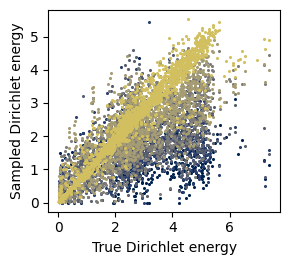

In [259]:
G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

sampling_props = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75]

fig, ax = plt.subplots(figsize=(3,2.75))
cmap = cm.get_cmap('cividis')
num_colors = len(sampling_props)

for i, sampling_prop in enumerate(sampling_props):
    color = cmap(i / num_colors)
    G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                sample_size=sampling_prop)
    graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                    k=int(np.sqrt(G_sampled.number_of_nodes())))
    graph_ruggedness_de.compute_local_dirichlet_energy(G=G_sampled)

    G_sampled_de_dict = {
        G_sampled.nodes[node]['sequence']: G_sampled.nodes[node]['local_dirichlet'] for node in G_sampled.nodes
    }
    G_k_con_vals = [G_k_de_dict[key]/int(np.sqrt(G_k_con.number_of_nodes())) for key in G_sampled_de_dict.keys()]
    G_sampled_con_vals = [G_sampled_de_dict[key]/int(np.sqrt(G_sampled.number_of_nodes())) for key in G_sampled_de_dict.keys()]
    plt.tight_layout()
    plt.scatter(G_k_con_vals, G_sampled_con_vals, alpha=1, s=1.5, color=color)
    plt.xlabel('True Dirichlet energy')
    plt.ylabel('Sampled Dirichlet energy')

plt.savefig('figures/Figure_4/sampled_vs_true_local_dirichlet.pdf')

## Full graph of local Dirichlet Energies

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/89072562.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('plasma', 10)


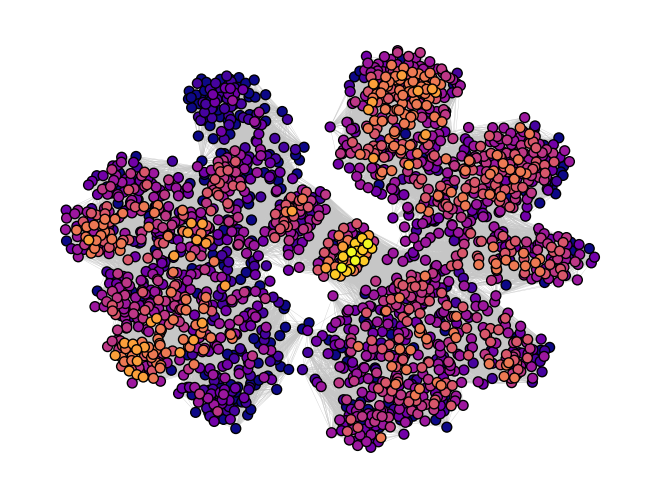

In [226]:
values = [node[1]['local_dirichlet'] for node in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('plasma', 10)
#pos = nx.spring_layout(G_k_con, k=0.35)

nodes_sorted_by_value = sorted(G_k_con.nodes(data=True), key=lambda x: x[1]['local_dirichlet'])
node_colors = [viridis((node[1]['local_dirichlet'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

plt.tight_layout()
nx.draw(G_k_con, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=50, width=0.25, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_graph_full.pdf')
plt.show()

## Full graph of activities

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/40350054.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


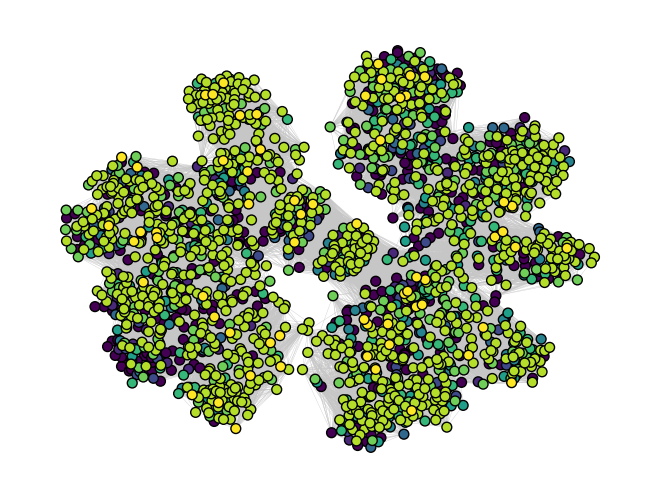

In [227]:
values = [node[1]['value'] for node in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

nodes_sorted_by_value = sorted(G_k_con.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

plt.tight_layout()
nx.draw(G_k_con, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=50, width=0.25, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_graph_full_activity.pdf')
plt.show()

## Exploration of map

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/761613826.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


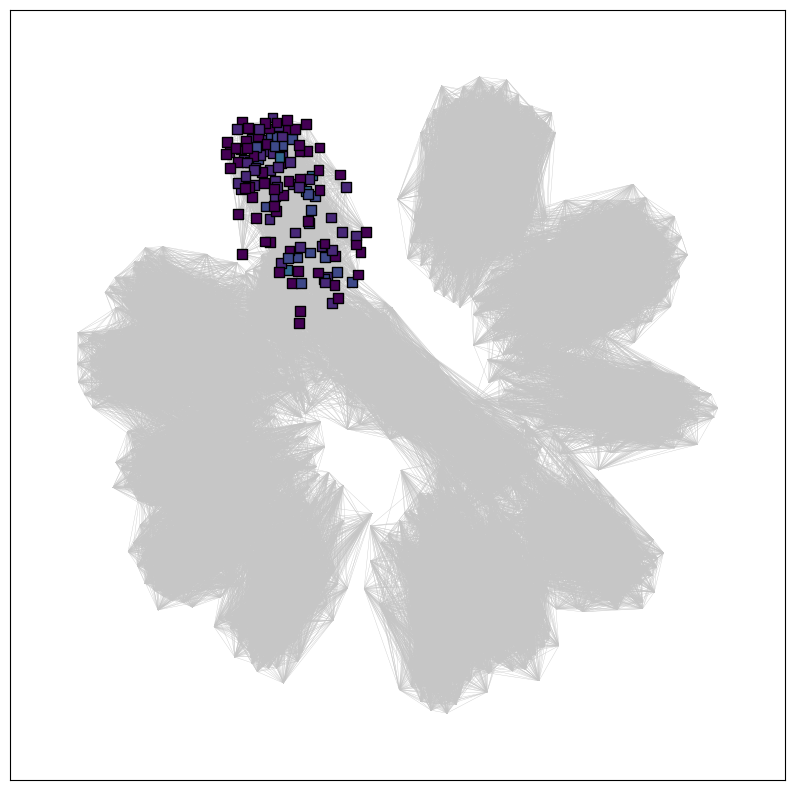

In [220]:
# Assuming G_k_con is your graph and nodes have 'local_dirichlet' and 'sequence' attributes
values = [node[1]['local_dirichlet'] for node in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
#pos = nx.spring_layout(G_k_con, k=0.35)

nodes_sorted_by_value = sorted(G_k_con.nodes(data=True), key=lambda x: x[1]['local_dirichlet'])
node_colors = [viridis((node[1]['local_dirichlet'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

# Identify nodes where the amino acid at position 144 is 'I'
square_nodes = [node[0] for node in G_k_con.nodes(data=True) if node[1]['sequence'][144] == 'L' and node[1]['sequence'][146] == 'L'\
                and node[1]['sequence'][147] == 'R' and node[1]['sequence'][169] == 'G']
circle_nodes = [node for node in G_k_con.nodes() if node not in square_nodes]

plt.figure(figsize=(10, 10))
plt.tight_layout()

# Draw nodes with circles
#nx.draw_networkx_nodes(G_k_con, pos, nodelist=circle_nodes, node_color=[node_colors[nodes_sorted.index(node)] for node in circle_nodes], node_shape='o', edgecolors='black', node_size=50)

# Draw nodes with squares
nx.draw_networkx_nodes(G_k_con, pos, nodelist=square_nodes, node_color=[node_colors[nodes_sorted.index(node)] for node in square_nodes], node_shape='s', edgecolors='black', node_size=50)

# Draw edges
nx.draw_networkx_edges(G_k_con, pos, width=0.25, edge_color='#C6C6C6')

plt.show()


## Smooth background 

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/3022092760.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


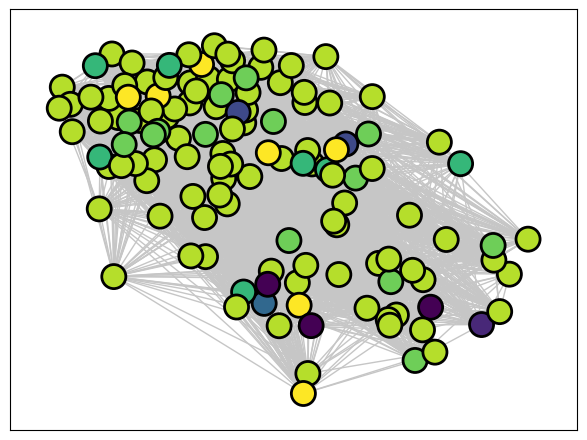

In [228]:
square_nodes = [node[0] for node in G_k_con.nodes(data=True) if node[1]['sequence'][144] == 'L' and node[1]['sequence'][146] == 'L'\
                and node[1]['sequence'][147] == 'R' and node[1]['sequence'][169] == 'G']

# Get immediate neighbors of the square nodes
neighbors = set()
for node in square_nodes:
    neighbors.update(G_k_con.neighbors(node))
neighbors = list(neighbors)

# Create a subgraph with square_nodes and their neighbors
subgraph_nodes = set(square_nodes + neighbors)
subgraph = G_k_con.subgraph(subgraph_nodes)

# Filter edges to include only those connected to square_nodes
edges_to_draw = [(u, v) for u, v in subgraph.edges() if u in square_nodes or v in square_nodes]

# Get node colors based on 'value' attribute
values = [data['value'] for node, data in subgraph.nodes(data=True)]
G_k_con_values = [data['value'] for node, data in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
min_value = min(G_k_con_values)
max_value = max(G_k_con_values)
node_colors = [viridis((data['value'] - min_value) / (max_value - min_value)) for node, data in subgraph.nodes(data=True)]

fig, ax = plt.subplots()
plt.tight_layout()

# Draw nodes with circles
circle_nodes = [node for node in subgraph.nodes() if node not in square_nodes]
nx.draw_networkx_nodes(subgraph, pos, nodelist=circle_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in circle_nodes], node_shape='o', edgecolors='black', node_size=100, linewidths=2)

# Draw nodes with squares
nx.draw_networkx_nodes(subgraph, pos, nodelist=square_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in square_nodes], node_shape='o', edgecolors='black', node_size=300, linewidths=2)

# Draw edges connected to square_nodes
nx.draw_networkx_edges(subgraph, pos, edgelist=edges_to_draw, width=1, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_smooth_background_activity.pdf')
plt.show()

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/290069400.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('plasma', 10)


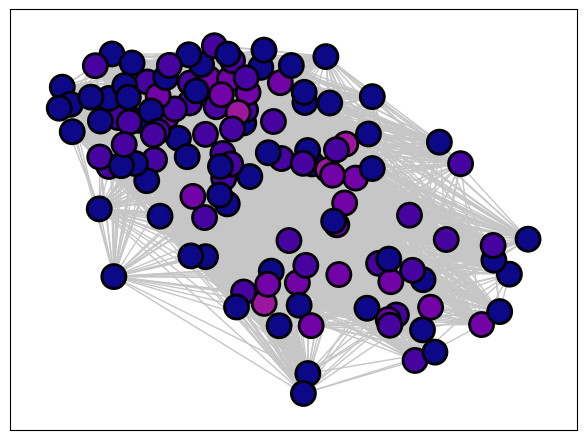

In [229]:
square_nodes = [node[0] for node in G_k_con.nodes(data=True) if node[1]['sequence'][144] == 'L' and node[1]['sequence'][146] == 'L'\
                and node[1]['sequence'][147] == 'R' and node[1]['sequence'][169] == 'G']

# Get immediate neighbors of the square nodes
neighbors = set()
for node in square_nodes:
    neighbors.update(G_k_con.neighbors(node))
neighbors = list(neighbors)

# Create a subgraph with square_nodes and their neighbors
subgraph_nodes = set(square_nodes + neighbors)
subgraph = G_k_con.subgraph(subgraph_nodes)

# Filter edges to include only those connected to square_nodes
edges_to_draw = [(u, v) for u, v in subgraph.edges() if u in square_nodes or v in square_nodes]

# Get node colors based on 'value' attribute
values = [data['local_dirichlet'] for node, data in subgraph.nodes(data=True)]
G_k_con_values = [data['local_dirichlet'] for node, data in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('plasma', 10)
min_value = min(G_k_con_values)
max_value = max(G_k_con_values)
node_colors = [viridis((data['local_dirichlet'] - min_value) / (max_value - min_value)) for node, data in subgraph.nodes(data=True)]

fig, ax = plt.subplots()
plt.tight_layout()

# Draw nodes with circles
circle_nodes = [node for node in subgraph.nodes() if node not in square_nodes]

nx.draw_networkx_nodes(subgraph, pos, nodelist=circle_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in circle_nodes], node_shape='o', edgecolors='black', node_size=100, linewidths=2)

# Draw nodes with squares
nx.draw_networkx_nodes(subgraph, pos, nodelist=square_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in square_nodes], node_shape='o', edgecolors='black', node_size=300, linewidths=2)

# Draw edges connected to square_nodes
nx.draw_networkx_edges(subgraph, pos, edgelist=edges_to_draw, width=1, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_smooth_background_DE.pdf')
plt.show()

## Rugged background

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/1051864602.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


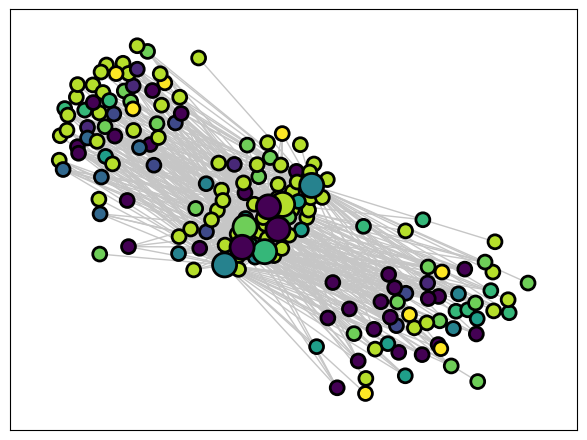

In [230]:
square_nodes = [node[0] for node in G_k_con.nodes(data=True) if node[1]['sequence'][144] == 'I' and node[1]['sequence'][146] == 'L' \
                and node[1]['sequence'][147] == 'Q' and node[1]['sequence'][150] == 'K' and node[1]['sequence'][151] == 'I' \
                and node[1]['sequence'][163] == 'L' and node[1]['sequence'][164] == 'D' and node[1]['sequence'][169] == 'S']

# Get immediate neighbors of the square nodes
neighbors = set()
for node in square_nodes:
    neighbors.update(G_k_con.neighbors(node))
neighbors = list(neighbors)

# Create a subgraph with square_nodes and their neighbors
subgraph_nodes = set(square_nodes + neighbors)
subgraph = G_k_con.subgraph(subgraph_nodes)

# Filter edges to include only those connected to square_nodes
edges_to_draw = [(u, v) for u, v in subgraph.edges() if u in square_nodes or v in square_nodes]

# Get node colors based on 'value' attribute
values = [data['value'] for node, data in subgraph.nodes(data=True)]
G_k_con_values = [data['value'] for node, data in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
min_value = min(G_k_con_values)
max_value = max(G_k_con_values)
node_colors = [viridis((data['value'] - min_value) / (max_value - min_value)) for node, data in subgraph.nodes(data=True)]

fig, ax = plt.subplots()
plt.tight_layout()

# Draw nodes with circles
circle_nodes = [node for node in subgraph.nodes() if node not in square_nodes]
nx.draw_networkx_nodes(subgraph, pos, nodelist=circle_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in circle_nodes], node_shape='o', edgecolors='black', node_size=100, linewidths=2)

# Draw nodes with squares
nx.draw_networkx_nodes(subgraph, pos, nodelist=square_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in square_nodes], node_shape='o', edgecolors='black', node_size=300, linewidths=2)

# Draw edges connected to square_nodes
nx.draw_networkx_edges(subgraph, pos, edgelist=edges_to_draw, width=1, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_rugged_background_activity.pdf')
plt.show()

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/3467422863.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('plasma', 10)


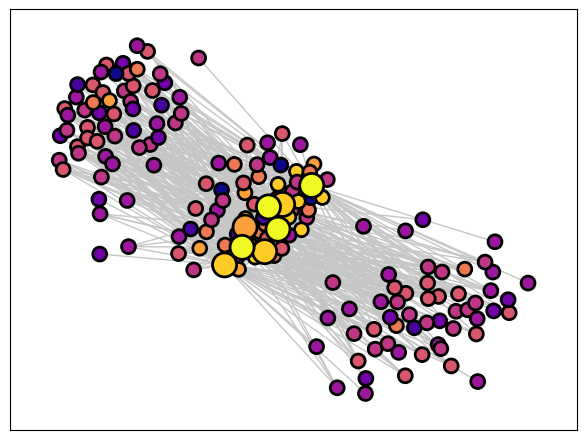

In [231]:
square_nodes = [node[0] for node in G_k_con.nodes(data=True) if node[1]['sequence'][144] == 'I' and node[1]['sequence'][146] == 'L' \
                and node[1]['sequence'][147] == 'Q' and node[1]['sequence'][150] == 'K' and node[1]['sequence'][151] == 'I' \
                and node[1]['sequence'][163] == 'L' and node[1]['sequence'][164] == 'D' and node[1]['sequence'][169] == 'S']

# Get immediate neighbors of the square nodes
neighbors = set()
for node in square_nodes:
    neighbors.update(G_k_con.neighbors(node))
neighbors = list(neighbors)

# Create a subgraph with square_nodes and their neighbors
subgraph_nodes = set(square_nodes + neighbors)
subgraph = G_k_con.subgraph(subgraph_nodes)

# Filter edges to include only those connected to square_nodes
edges_to_draw = [(u, v) for u, v in subgraph.edges() if u in square_nodes or v in square_nodes]

# Get node colors based on 'value' attribute
values = [data['local_dirichlet'] for node, data in subgraph.nodes(data=True)]
G_k_con_values = [data['local_dirichlet'] for node, data in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('plasma', 10)
min_value = min(G_k_con_values)
max_value = max(G_k_con_values)
node_colors = [viridis((data['local_dirichlet'] - min_value) / (max_value - min_value)) for node, data in subgraph.nodes(data=True)]

fig, ax = plt.subplots()
plt.tight_layout()

# Draw nodes with circles
circle_nodes = [node for node in subgraph.nodes() if node not in square_nodes]

nx.draw_networkx_nodes(subgraph, pos, nodelist=circle_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in circle_nodes], node_shape='o', edgecolors='black', node_size=100, linewidths=2)

# Draw nodes with squares
nx.draw_networkx_nodes(subgraph, pos, nodelist=square_nodes, node_color=[node_colors[list(subgraph.nodes()).index(node)] for node in square_nodes], node_shape='o', edgecolors='black', node_size=300, linewidths=2)

# Draw edges connected to square_nodes
nx.draw_networkx_edges(subgraph, pos, edgelist=edges_to_draw, width=1, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_rugged_background_DE.pdf')
plt.show()

## Sampled map

Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4322.51it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44033.97it/s]
Computing local Dirichlet energy.: 1133it [00:01, 744.74it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_711/3757261698.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('plasma', 10)


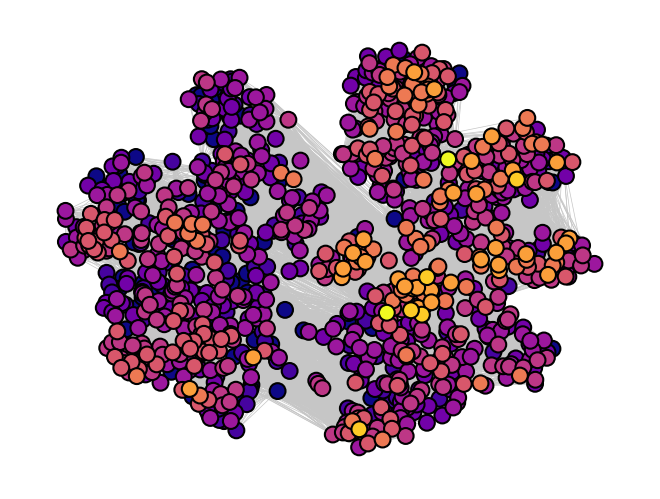

In [256]:
G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                            sample_size=0.4)
graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                k=int(np.sqrt(G_sampled.number_of_nodes())))
graph_ruggedness_de.compute_local_dirichlet_energy(G=G_sampled)

values = [node[1]['local_dirichlet'] for node in G_sampled.nodes(data=True)]
viridis = plt.cm.get_cmap('plasma', 10)

nodes_sorted_by_value = sorted(G_sampled.nodes(data=True), key=lambda x: x[1]['local_dirichlet'])
node_colors = [viridis((node[1]['local_dirichlet'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

plt.tight_layout()
nx.draw(G_sampled, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=130, linewidths=1.5, width=0.5, edge_color='#C6C6C6')
plt.savefig('figures/Figure_4/His3p_graph_sampled04.pdf')
plt.show()

Computing OHE dictionary.: 20it [00:00, 18137.53it/s]
Adding nodes to graph.: 2028it [00:00, 19743.95it/s]
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_22497/145008562.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_bw = cm.get_cmap('Greys')


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4559.80it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58989.08it/s]
Computing local Dirichlet energy.: 524it [00:00, 1597.90it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4489.07it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 39410.37it/s]
Computing local Dirichlet energy.: 727it [00:00, 1173.56it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4805.09it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 46217.95it/s]
Computing local Dirichlet energy.: 930it [00:00, 961.25it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4639.37it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46394.99it/s]
Computing local Dirichlet energy.: 1133it [00:01, 732.02it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4762.55it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43770.52it/s]
Computing local Dirichlet energy.: 1336it [00:02, 634.10it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4251.69it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37836.27it/s]
Computing local Dirichlet energy.: 1843it [00:04, 422.34it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4664.28it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58817.01it/s]
Computing local Dirichlet energy.: 524it [00:00, 1346.36it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4615.02it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 53728.60it/s]
Computing local Dirichlet energy.: 727it [00:00, 1213.24it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4569.40it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 44126.10it/s]
Computing local Dirichlet energy.: 930it [00:01, 873.36it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4727.83it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45896.72it/s]
Computing local Dirichlet energy.: 1133it [00:01, 740.59it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4601.65it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 45052.90it/s]
Computing local Dirichlet energy.: 1336it [00:01, 677.23it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4808.77it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 38155.82it/s]
Computing local Dirichlet energy.: 1843it [00:04, 436.34it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4606.96it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60923.50it/s]
Computing local Dirichlet energy.: 524it [00:00, 1593.60it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4782.42it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 53924.33it/s]
Computing local Dirichlet energy.: 727it [00:00, 1257.61it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4736.06it/s]

Building approx. NN search tree(s).


Done.


Adding approximate KNN edges.: 930it [00:00, 47480.37it/s]
Computing local Dirichlet energy.: 930it [00:01, 922.17it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4758.18it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 47549.04it/s]
Computing local Dirichlet energy.: 1133it [00:01, 797.92it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4734.16it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44023.96it/s]
Computing local Dirichlet energy.: 1336it [00:02, 616.08it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4604.65it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37946.23it/s]
Computing local Dirichlet energy.: 1843it [00:04, 442.51it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4612.64it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58114.05it/s]
Computing local Dirichlet energy.: 524it [00:00, 1159.80it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4763.68it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 54011.25it/s]
Computing local Dirichlet energy.: 727it [00:00, 1185.04it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4701.57it/s]

Building approx. NN search tree(s).


Done.


Adding approximate KNN edges.: 930it [00:00, 46661.36it/s]
Computing local Dirichlet energy.: 930it [00:00, 948.78it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4744.02it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46558.18it/s]
Computing local Dirichlet energy.: 1133it [00:01, 761.88it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4758.73it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44089.78it/s]
Computing local Dirichlet energy.: 1336it [00:02, 636.95it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4570.91it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37957.78it/s]
Computing local Dirichlet energy.: 1843it [00:04, 426.44it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4584.84it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58785.55it/s]
Computing local Dirichlet energy.: 524it [00:00, 1575.17it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 3973.50it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 40879.17it/s]
Computing local Dirichlet energy.: 727it [00:00, 983.26it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4741.53it/s]

Building approx. NN search tree(s).


Done.


Adding approximate KNN edges.: 930it [00:00, 45550.33it/s]
Computing local Dirichlet energy.: 930it [00:00, 940.87it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4653.26it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46810.41it/s]
Computing local Dirichlet energy.: 1133it [00:01, 774.78it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4749.52it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44143.61it/s]
Computing local Dirichlet energy.: 1336it [00:02, 659.44it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4618.85it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 32201.25it/s]
Computing local Dirichlet energy.: 1843it [00:04, 416.82it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4572.77it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58177.12it/s]
Computing local Dirichlet energy.: 524it [00:00, 1340.81it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4484.83it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 51846.68it/s]
Computing local Dirichlet energy.: 727it [00:00, 1231.35it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4802.16it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 47374.27it/s]
Computing local Dirichlet energy.: 930it [00:01, 891.28it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4635.69it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44494.09it/s]
Computing local Dirichlet energy.: 1133it [00:01, 722.63it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4664.24it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44291.20it/s]
Computing local Dirichlet energy.: 1336it [00:02, 659.40it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4735.85it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37698.25it/s]
Computing local Dirichlet energy.: 1843it [00:04, 431.91it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4542.78it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 61357.21it/s]
Computing local Dirichlet energy.: 524it [00:00, 1642.40it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4752.70it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 52140.13it/s]
Computing local Dirichlet energy.: 727it [00:00, 1189.27it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4762.56it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 43907.05it/s]
Computing local Dirichlet energy.: 930it [00:00, 965.45it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4739.22it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45751.79it/s]
Computing local Dirichlet energy.: 1133it [00:01, 761.89it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4813.46it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44752.11it/s]
Computing local Dirichlet energy.: 1336it [00:02, 660.01it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4659.84it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 38440.63it/s]
Computing local Dirichlet energy.: 1843it [00:04, 428.06it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4632.17it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 58783.98it/s]
Computing local Dirichlet energy.: 524it [00:00, 1635.99it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4786.52it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 55563.31it/s]
Computing local Dirichlet energy.: 727it [00:00, 1277.26it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4614.31it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 930it [00:00, 46649.64it/s]
Computing local Dirichlet energy.: 930it [00:00, 947.05it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4773.92it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 44733.24it/s]
Computing local Dirichlet energy.: 1133it [00:01, 780.35it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4573.46it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 43047.92it/s]
Computing local Dirichlet energy.: 1336it [00:02, 611.32it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4767.60it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 38192.96it/s]
Computing local Dirichlet energy.: 1843it [00:04, 444.50it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4569.39it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60237.22it/s]
Computing local Dirichlet energy.: 524it [00:00, 1624.26it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4831.30it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 53478.88it/s]
Computing local Dirichlet energy.: 727it [00:00, 1211.42it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4703.86it/s]

Building approx. NN search tree(s).


Done.


Adding approximate KNN edges.: 930it [00:00, 48535.52it/s]
Computing local Dirichlet energy.: 930it [00:01, 852.56it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4805.67it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 46634.93it/s]
Computing local Dirichlet energy.: 1133it [00:01, 812.73it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4628.44it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 44859.23it/s]
Computing local Dirichlet energy.: 1336it [00:01, 681.17it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4647.01it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 38134.55it/s]
Computing local Dirichlet energy.: 1843it [00:04, 440.38it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 524it [00:00, 4323.33it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 524it [00:00, 60482.56it/s]
Computing local Dirichlet energy.: 524it [00:00, 1631.92it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 727it [00:00, 4807.46it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 727it [00:00, 53519.25it/s]
Computing local Dirichlet energy.: 727it [00:00, 1271.11it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 930it [00:00, 4734.24it/s]

Building approx. NN search tree(s).


Done.


Adding approximate KNN edges.: 930it [00:00, 46815.36it/s]
Computing local Dirichlet energy.: 930it [00:00, 953.49it/s] 


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1133it [00:00, 4758.99it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1133it [00:00, 45612.14it/s]
Computing local Dirichlet energy.: 1133it [00:01, 758.23it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1336it [00:00, 4778.41it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1336it [00:00, 45203.73it/s]
Computing local Dirichlet energy.: 1336it [00:01, 668.62it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1843it [00:00, 4776.95it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1843it [00:00, 37836.83it/s]
Computing local Dirichlet energy.: 1843it [00:04, 436.39it/s]


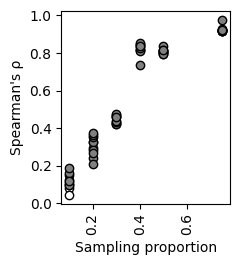

In [185]:
G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

sampling_props = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
fig, ax = plt.subplots(figsize=(2.5,2.75))
cmap_bw = cm.get_cmap('Greys')
for _ in range(10):
    for i, sampling_prop in enumerate(sampling_props):
        color = cmap(i / num_colors)
        G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                    sample_size=sampling_prop)
        graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                        k=int(np.sqrt(G_sampled.number_of_nodes())))
        graph_ruggedness_de.compute_local_dirichlet_energy(G=G_sampled)

        G_sampled_de_dict = {
            G_sampled.nodes[node]['sequence']: G_sampled.nodes[node]['local_dirichlet'] for node in G_sampled.nodes
        }
        G_k_con_vals = [G_k_de_dict[key] for key in G_sampled_de_dict.keys()]
        G_sampled_con_vals = [G_sampled_de_dict[key] for key in G_sampled_de_dict.keys()]
        corr = spearmanr(G_k_con_vals, G_sampled_con_vals)
        spearman_corr = corr[0]
        sig = corr[1]
        color = ('white' if sig > 0.05 else 'grey')
        plt.tight_layout()
        plt.scatter(sampling_prop, spearman_corr, c=color, edgecolors='black')
        plt.xticks(rotation=90)
        plt.xlabel('Sampling proportion')
        plt.ylabel("Spearman's ρ")

plt.savefig('figures/Figure_4/spearman_vs_sampling_prop.pdf')
    

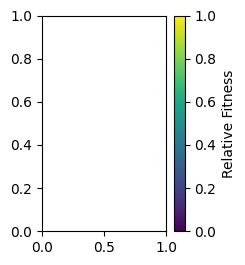

In [274]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(2.5,2.75))

# Create a mappable object with the viridis colormap
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar to the plot
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Relative Fitness')

# Show the plot
plt.tight_layout()
plt.savefig('figures/Figure_4/viridis_cbar.pdf')
plt.show()

### Sampling Dirichlet energy over different degrees of incidence
Different degrees of incidence, sampled with `sample_graph_degree`, can be used to gain insight on the contributions of epistasis of n degrees / edges. 

### Epistasis as a function of ruggedness
Starting from a reference node (sequence in the graph), the change in ruggedness as a function of incidence provides insight on the linearity of the fitness function over the system. For example, if the dirichlet energy remains unchanged as the degree increases from a reference node, the fitness of the reference node is not confounded by epistasis. If It linearly increases, the fitness of the reference node is influenced equally by each degree of the graph. If it increases non-linearly, the curvature over the degree can be measured as the sum of discretised second derivatives at each point. If the sum of second derivatives if positive, then non-linearity is injected disproportionately by one degree in the graph. Therefore, the epistasis (or a measurement of it) over a n edge degrees can be described by two values: the gradient in energy over the first through nth degree of the graph (with respect to a particular node) and the curvatrue, or sum of second derivatives. The distribution of these values give insight on the isotropy of the fitness landscape: if there is a wide spread of values, the landscape is anisotropic. 

In [179]:
df = pd.read_csv('../data_files/His3p_combinatorial.csv')
seq_ls = df['sequences'].tolist()
values = df['fitness'].tolist()
scaler = MinMaxScaler()
values = [val[0] for val in (scaler.fit_transform(np.array(values).reshape(-1,1)))]

G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=True,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=400)

Computing OHE dictionary.: 20it [00:00, 54827.50it/s]
Adding nodes to graph.: 2028it [00:00, 22250.77it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 2028it [00:00, 4648.79it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 2028it [00:00, 29752.25it/s]


In [65]:
G_k_de = graph_ruggedness_de.compute_dirichlet_energy(G=G_k)

In [66]:
replicates = 50
degree_dict = {}
for replicate in range(replicates):
    avg_diffs = []
    G_sampled, ref_node, de_degree= graph_ruggedness_de.sample_graph_degree(G=G_k,
                                                        degree=3, 
                                                        compute_de=True,
                                                        approximate=False)
    
    diff_ls = graph_ruggedness_de.count_seq_diff(ref_node=ref_node,
                                                    node_ls=[node for node in G_sampled.nodes()])
    avg_diffs.append(np.mean(diff_ls))
    degree_dict[replicate] = (de_degree, np.array(avg_diffs))

Enumerating nodes in current level.: 100%|██████████| 177/177 [00:00<00:00, 6260.37it/s]


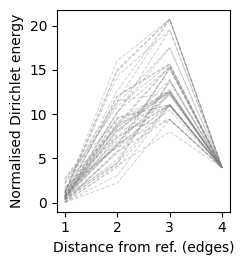

In [67]:
fig, ax = plt.subplots(figsize=(2.5,2.75))
x_labs = list(range(1,5))
for i in range(50):
    vals = [val for val in degree_dict[i][0].values()]
    vals.append(G_k_de / G_k.number_of_nodes())
    ax.plot(x_labs, vals, color='grey', linestyle='--', linewidth=0.75, alpha=0.35)
plt.xlabel('Distance from ref. (edges)')
plt.ylabel('Normalised Dirichlet energy')
plt.tight_layout()
plt.savefig('figures/Figure_4/de_vs_degree_plot.pdf')
plt.show()


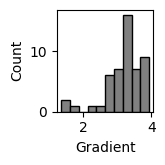

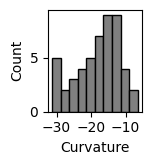

In [55]:
fig, ax = plt.subplots(figsize=(1.75,1.75))

first_derivative = []
second_derivative = []
for i in range(50):
    vals = [val for val in degree_dict[i][0].values()]
    vals.append(G_k_de / G_k.number_of_nodes())
    derivatives = [vals[i+1] - vals[i] for i in range(len(vals) - 1)]
    first_derivative.append(sum(derivatives))
    second_derivatives = [derivatives[i+1] - derivatives[i] for i in range(len(derivatives) - 1)]
    second_derivative.append(sum(second_derivatives))

plt.hist(first_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Gradient')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figures/Figure_4/gradient_hist_full.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(1.75,1.75))
plt.hist(second_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Curvature')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figures/Figure_4/curvature_hist_full.pdf')
plt.show()

### Epistasis as a function of ruggedness over incomplete fitness maps 
Measuring epistasis as the gradient and curvature of ruggedness with respect to the degree from a reference node should be (approximately) reproducible between subsampled and complete network Graphs. This can be tested by repeating the previous analyses in subsampled graphs. 

#### Note: the following cells each take > 4 hours to compute. 

In [ ]:
sampling_prop = 0.1
nodes = G_k.number_of_nodes()
sampling_reps = 5
degree_dict_01_ls = []
de_full_01 = {}
for sampling_replicate in range(sampling_reps):

    scaling_factor = np.sqrt(nodes) / np.sqrt(nodes*sampling_prop)
    G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                sample_size=sampling_prop)
    graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                k=int(np.sqrt(G_sampled.number_of_nodes())))
    G_sampled_de = graph_ruggedness_de.compute_dirichlet_energy_approximate(G_sampled) / G_sampled.number_of_nodes()
    de_full_01[sampling_replicate] = G_sampled_de

    replicates = 10
    degree_dict_01 = {}
    for replicate in range(replicates):
        avg_diffs = []
        G_sampled, ref_node, de_degree= graph_ruggedness_de.sample_graph_degree(G=G_sampled,
                                                            degree=3, 
                                                            compute_de=True,
                                                            approximate=True)
        diff_ls = graph_ruggedness_de.count_seq_diff(ref_node=ref_node,
                                                        node_ls=[node for node in G_sampled.nodes()])
        avg_diffs.append(np.mean(diff_ls))
        degree_dict_01[replicate] = (de_degree, np.array(avg_diffs))
        degree_dict_01_ls.append(degree_dict_01)


In [ ]:
fig, ax = plt.subplots(figsize=(1.75,1.75))

first_derivative = []
second_derivative = []
for i in range(5):
    for j in range(10):
        vals = [val for val in degree_dict_01_ls[i][j][0].values()]
        vals.append(de_full_01[i])
        ax.plot(vals, color='grey', linestyle='--', linewidth=0.75, alpha=0.35)
        derivatives = [vals[i+1] - vals[i] for i in range(len(vals) - 1)]
        first_derivative.append(sum(derivatives))
        second_derivatives = [derivatives[i+1] - derivatives[i] for i in range(len(derivatives) - 1)]
        second_derivative.append(sum(second_derivatives))

fig, ax = plt.subplots(figsize=(1.75,1.75))

plt.hist(first_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Gradient')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(1.75,1.75))
plt.hist(second_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Curvature')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
sampling_prop = 0.5
nodes = G_k.number_of_nodes()
sampling_reps = 5
degree_dict_05_ls = []
de_full_05 = {}
for sampling_replicate in range(sampling_reps):

    scaling_factor = np.sqrt(nodes) / np.sqrt(nodes*sampling_prop)
    G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                sample_size=sampling_prop)
    G_sampled_de = graph_ruggedness_de.compute_dirichlet_energy_approximate(G_sampled) / G_sampled.number_of_nodes()
    de_full_05[sampling_replicate] = G_sampled_de
    graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                k=int(np.sqrt(G_sampled.number_of_nodes())))
    replicates = 10
    degree_dict_05 = {}
    for replicate in range(replicates):
        avg_diffs = []
        G_sampled, ref_node, de_degree= graph_ruggedness_de.sample_graph_degree(G=G_sampled,
                                                            degree=3, 
                                                            compute_de=True,
                                                            approximate=True)
        diff_ls = graph_ruggedness_de.count_seq_diff(ref_node=ref_node,
                                                        node_ls=[node for node in G_sampled.nodes()])
        avg_diffs.append(np.mean(diff_ls))
        degree_dict_05[replicate] = (de_degree, np.array(avg_diffs))
        degree_dict_05_ls.append(degree_dict_05)


In [ ]:
fig, ax = plt.subplots(figsize=(1.75,1.75))

first_derivative = []
second_derivative = []
for i in range(5):
    for j in range(10):
        vals = [val for val in degree_dict_05_ls[i][j][0].values()]
        vals.append(de_full_05[i])
        ax.plot(vals, color='grey', linestyle='--', linewidth=0.75, alpha=0.35)
        derivatives = [vals[i+1] - vals[i] for i in range(len(vals) - 1)]
        first_derivative.append(sum(derivatives))
        second_derivatives = [derivatives[i+1] - derivatives[i] for i in range(len(derivatives) - 1)]
        second_derivative.append(sum(second_derivatives))

fig, ax = plt.subplots(figsize=(1.75,1.75))

plt.hist(first_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Gradient')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(1.75,1.75))
plt.hist(second_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Curvature')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
vals = []
for i in range(5):
    for j in range(10):
        vals_sample = [val for val in degree_dict_05_ls[i][j][0].values()]

In [ ]:
fig, ax = plt.subplots(figsize=(1.75,1.75))

first_derivative = []
second_derivative = []
for i in range(10):
    for j in range(5):
        vals = [val for val in degree_dict_05_ls[i][j][0].values()]
        ax.plot(vals, color='grey', linestyle='--', linewidth=0.75, alpha=0.35)
        derivatives = [vals[i+1] - vals[i] for i in range(len(vals) - 1)]
        first_derivative.append(sum(derivatives))
        second_derivatives = [derivatives[i+1] - derivatives[i] for i in range(len(derivatives) - 1)]
        second_derivative.append(sum(second_derivatives))

fig, ax = plt.subplots(figsize=(1.75,1.75))

plt.hist(first_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Gradient')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(1.75,1.75))
plt.hist(second_derivative, bins=10, color='grey', edgecolor='black')
plt.xlabel('Curvature')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
degree_dict_05_ls[i][j-1]

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_22497/1066360923.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


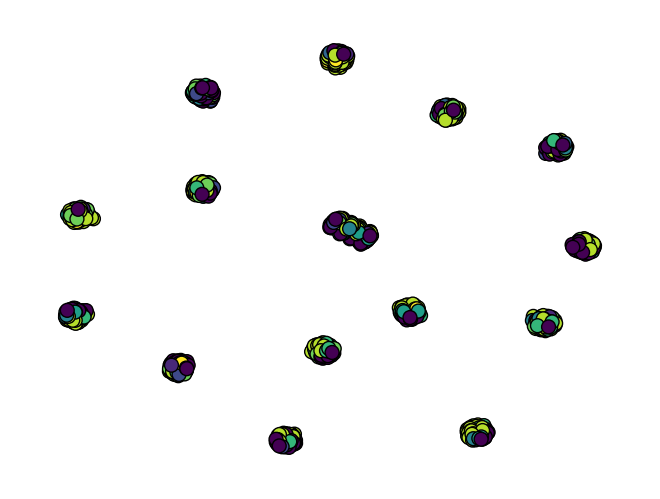

In [89]:
values = [node[1]['value'] for node in G_k_con.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
node_colors = [viridis((value - min(values)) / (max(values) - min(values))) for value in values]
nx.draw(G_k_con, node_color=node_colors, with_labels=False, edgecolors='black', node_size=100, width=0.75, edge_color='grey')
plt.show()

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_22497/2106169291.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)


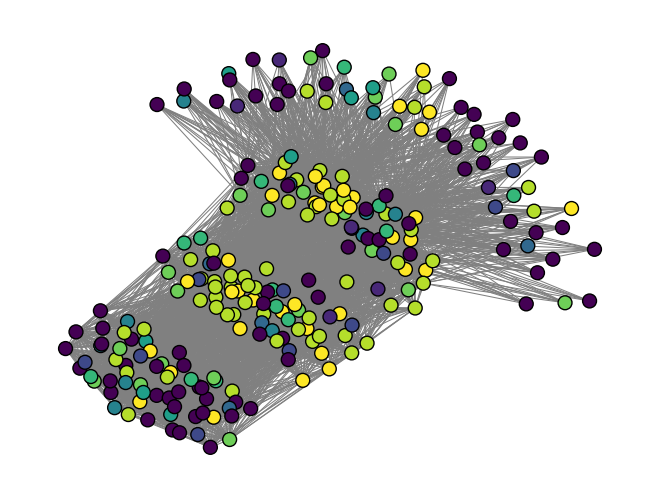

In [77]:
values = [node[1]['value'] for node in G_sampled.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)
node_colors = [viridis((value - min(values)) / (max(values) - min(values))) for value in values]
nx.draw(G_sampled, node_color=node_colors, with_labels=False, edgecolors='black', node_size=100, width=0.75, edge_color='grey')
plt.show()